<a href="https://colab.research.google.com/github/f2024065214-ops/projects-for-ML-supervised-learning-part1-/blob/main/Netflix_Eda_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


/tmp/ipython-input-4262718218.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette= 'Set2')


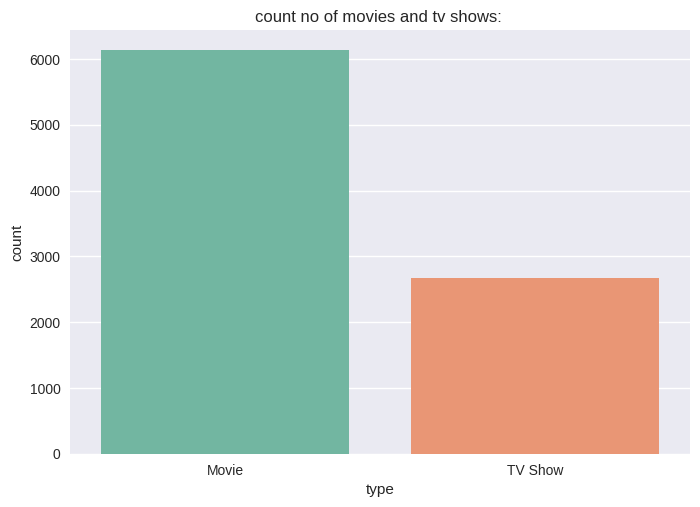

country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


/tmp/ipython-input-4262718218.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_countries.values, y= top_countries.index, palette= 'Set2')


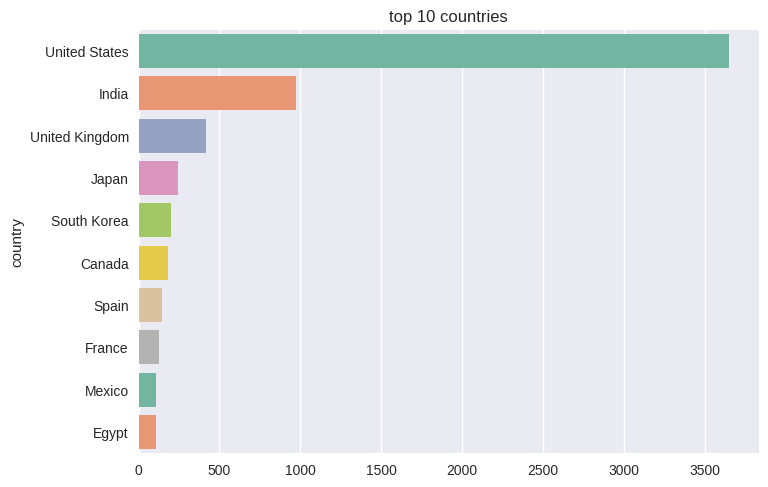

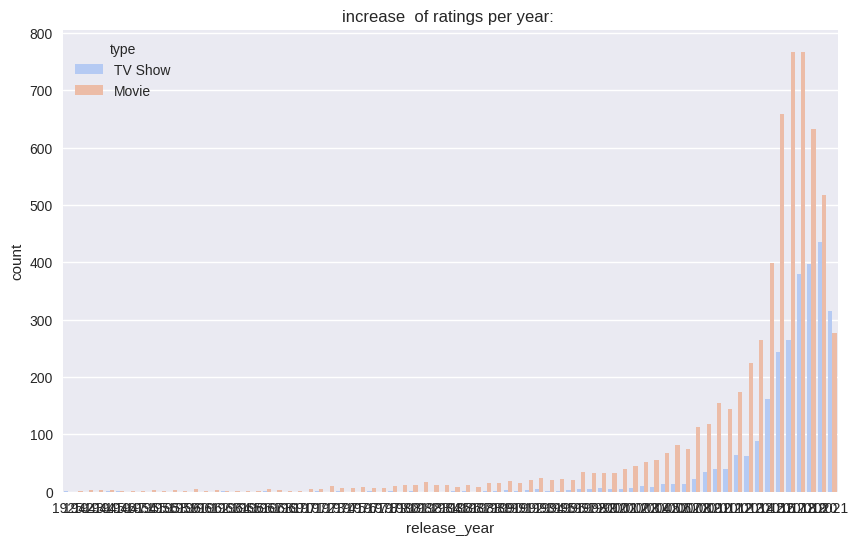

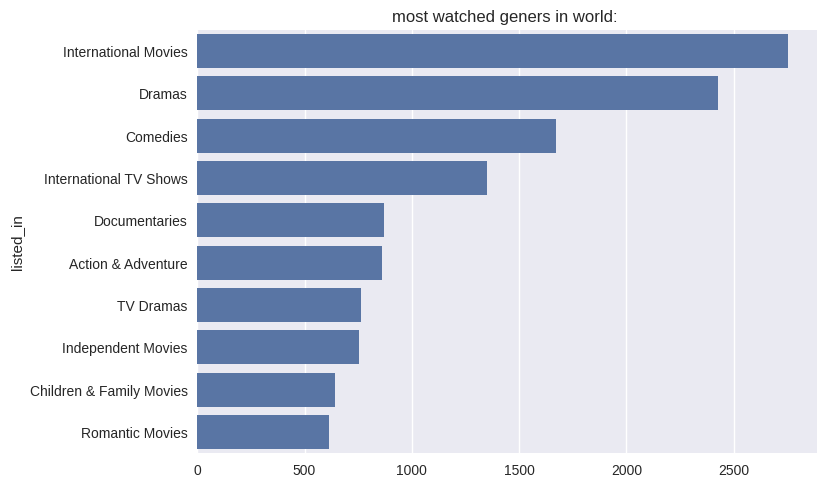

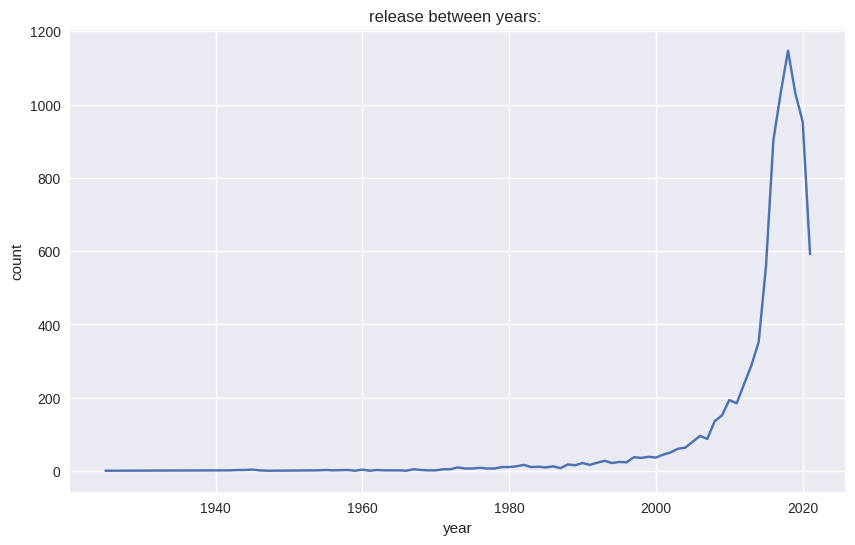

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
df= pd.read_csv('/content/sample_data/netflix_titles.csv.zip')
df.head()
df.info()

df.isnull().sum()
df.drop_duplicates(inplace=True)

df['country']= df['country'].fillna(df['country'].mode()[0])
df['director']= df['director'].fillna(df['director'].mode()[0])
df['cast']= df['cast'].fillna(df['cast'].mode()[0])
df['date_added']= df['date_added'].fillna(df['date_added'].mode()[0])
df['rating']= df['rating'].fillna(df['rating'].mode()[0])


df.head()

sns.countplot(x='type', data=df, palette= 'Set2')
plt.title("count no of movies and tv shows: ")
plt.show()

top_countries= df['country'].value_counts().head(10)
print(top_countries)
sns.barplot(x= top_countries.values, y= top_countries.index, palette= 'Set2')
plt.title("top 10 countries")
plt.show()



plt.figure(figsize=(10,6))
sns.countplot(x='release_year',hue='type', data=df,palette='coolwarm')
plt.title("increase  of ratings per year: ")
plt.show()

df['listed_in']= df['listed_in'].astype('str')
geners= df['listed_in'].str.split(',').explode().str.strip()
dd= geners.value_counts().head(10)
sns.barplot(x=dd.values, y=dd.index)
plt.title("most watched geners in world: ")
plt.show()

df['release_year']= pd.to_numeric(df['release_year'], errors= 'coerce')
df['release_year'].value_counts().sort_index().plot(kind= 'line', figsize=(10,6))
plt.title('release between years: ')
plt.xlabel('year')
plt.ylabel('count')
plt.show()

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/tmp/ipython-input-4225610707.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'Male': 1, 'Female': 0})


Grid search best params: {'clf': RandomForestClassifier(random_state=42), 'clf__max_depth': 10, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Grid search CV best score (mean CV accuracy): 0.8165655451369738
Test accuracy (best estimator): 0.8043478260869565

Classification report (best estimator):
               precision    recall  f1-score   support

           0       0.60      0.23      0.33        39
           1       0.82      0.96      0.89       145

    accuracy                           0.80       184
   macro avg       0.71      0.59      0.61       184
weighted avg       0.78      0.80      0.77       184

Confusion matrix:
 [[  9  30]
 [  6 139]]

Logistic Regression accuracy: 0.8261
              precision    recall  f1-score   support

           0       0.82      0.23      0.36        39
           1       0.83      0.99      0.90       145

    accuracy                           0.83       184
   macro avg       0.82      0.61      0.63       184
weighted avg

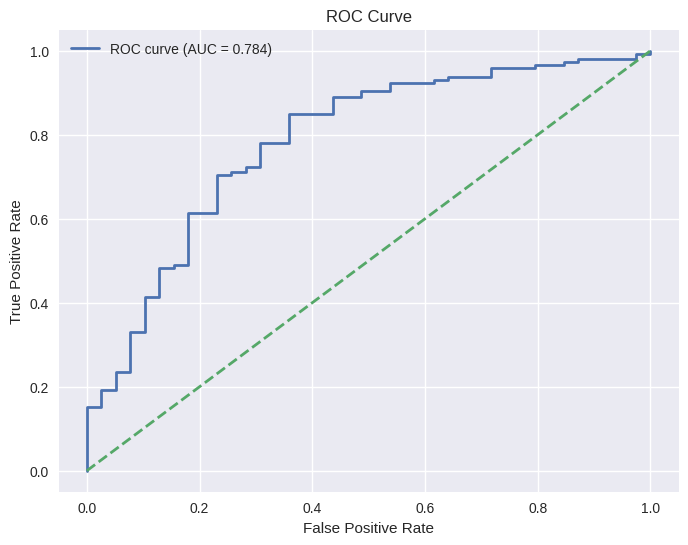

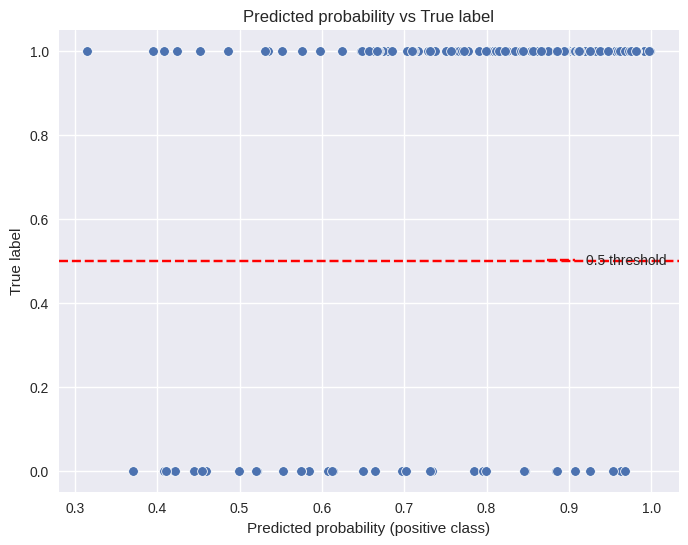

In [2]:
# corrected_heart_pipeline.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

df = pd.read_csv('/content/sample_data/heart_disease_uci (1).csv')

df['age']     = df['age'].fillna(df['age'].mean())
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['chol']    = df['chol'].fillna(df['chol'].mean())
df['ca']      = df['ca'].fillna(df['ca'].mean())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

df['thal']  = df['thal'].fillna(df['thal'].mode()[0])
df['cp']    = df['cp'].fillna(df['cp'].mode()[0])
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])


X = df.drop(['sex', 'id'], axis=1, errors='ignore')
y = df['sex']

y = y.replace({'Male': 1, 'Female': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

transformers = []
transformers.append(('num', numeric_transformer, numeric_features))
if len(categorical_features) > 0:
    transformers.append(('cat', categorical_transformer, categorical_features))

preprocessor = ColumnTransformer(transformers=transformers, remainder='drop')

base_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=5000, random_state=42))
])

param_grid = [
    {
        'clf': [LogisticRegression(max_iter=5000, random_state=42)],
        'clf__C': [0.1, 1.0, 10.0],
        'clf__penalty': ['l1', 'l2'],
        'clf__solver': ['liblinear']
    },
    {
        'clf': [SVC(probability=True, random_state=42)],
        'clf__C': [0.1, 1.0, 10.0],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ['scale', 'auto']
    },
    {
        'clf': [RandomForestClassifier(random_state=42)],
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [10, 20, None],
        'clf__min_samples_split': [2, 5]
    }
]

grid = GridSearchCV(base_pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

best_est = grid.best_estimator_
y_pred_class = best_est.predict(X_test)
acc = accuracy_score(y_test, y_pred_class)

print("Grid search best params:", grid.best_params_)
print("Grid search CV best score (mean CV accuracy):", grid.best_score_)
print("Test accuracy (best estimator):", acc)
print("\nClassification report (best estimator):\n", classification_report(y_test, y_pred_class))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_class))

model_pipelines = {
    'Logistic Regression': Pipeline([('preprocessor', preprocessor), ('clf', LogisticRegression(max_iter=5000))]),
    'SVC': Pipeline([('preprocessor', preprocessor), ('clf', SVC(probability=True))]),
    'Random Forest': Pipeline([('preprocessor', preprocessor), ('clf', RandomForestClassifier(random_state=42))])
}

accuracies = {}
for name, pipe in model_pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc_i = accuracy_score(y_test, y_pred)
    accuracies[name] = acc_i
    print(f"\n{name} accuracy: {acc_i:.4f}")
    print(classification_report(y_test, y_pred))

best_model_name = max(accuracies, key=accuracies.get)
print(f"\nBest model by simple test-set accuracy (from pipelines): {best_model_name} ({accuracies[best_model_name]:.4f})")

if hasattr(best_est.named_steps['clf'], "predict_proba"):
    y_proba = best_est.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)

    plt.style.use('seaborn-v0_8')
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
else:
    print("Best estimator does not support predict_proba; skipping ROC plot.")
if hasattr(best_est.named_steps['clf'], "predict_proba"):
    y_proba_all = best_est.predict_proba(X_test)[:, 1]
    plt.style.use('seaborn-v0_8')
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_proba_all, y=y_test)
    plt.xlabel('Predicted probability (positive class)')
    plt.ylabel('True label')
    plt.title('Predicted probability vs True label')
    plt.axhline(0.5, color='red', linestyle='--', label='0.5 threshold')
    plt.legend()
    plt.show()
else:
    plt.style.use('seaborn-v0_8')
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred_class, y=y_test)
    plt.xlabel('Predicted class')
    plt.ylabel('True label')
    plt.title('Predicted class vs True label')
    plt.show()
